# College of Computing and Informatics, Drexel University
## INFO 323: Cloud Computing and Big Data
### Due: Wednesday, June 11, 2025
---

## Final Project Report

## Project Title: Modeling Employee Satisfaction Using PySpark and Machine Learning in the Cloud

## Student(s): Niyam Acharya, Manish Gurung, Sahil Adhikari

# Date: 06/10/2025
---

# Project Requirements

This final project examines the level of knowledge the students have learned from the course. The project must be done on a cloud computing platform.

## Projects must apply cloud computing platforms and technqiues for data science problems.

# 1. Problem Definition
---
*(Define the problem that will be solved in this cloud computing project.)*

In this project, we are trying to figure out what makes employees feel satisfied at their job. Not everyone with the same salary or work hours feels the same about their job, so we want to find patterns in the data that explain why. We will use a dataset with information like salary, number of projects, work hours, and more to see how these factors affect satisfaction.

Our main goal is to build a model that can predict how satisfied an employee might be (on a scale from 0 to 10) based on the other details in the data. We will use big data tools like Spark and Databricks to process and analyze the data in the cloud.

---

# 2. Data Set
---
*(Describe the origin, format, and  charateristics of the data.)*

The dataset we are using comes from Kaggle. It is called the Employee Satisfaction Survey dataset. It includes different types of information about employees like their satisfaction level, how many projects they worked on, how many hours they work each month, whether they got a promotion, and more.

The file is in CSV format, which makes it easy to load and work with. Each row in the file represents an employee, and each column has details about that employee. One of the columns is “satisfaction_level”, which we are trying to predict.

We uploaded this dataset to Databricks e so we can use it easily in Databricks with PySpark.

Link to the dataset: https://www.kaggle.com/datasets/redpen12/employees-satisfaction-analysis

---

In [0]:
# check availability of Spark
spark.version

Out[1]: '3.3.2'

In [0]:
#check to see if dataset was uploaded
dbutils.fs.ls("/FileStore/tables/Employee_Attrition.csv")

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/Employee_Attrition.csv', name='Employee_Attrition.csv', size=624339, modificationTime=1749330822000)]

In [0]:
# Load the dataset into a Spark DataFrame
df = spark.read.csv("/FileStore/tables/Employee_Attrition.csv", header=True, inferSchema=True)

#dropping any null values
df = df.dropna()

# Show the first 5 rows of the dataset
df.show(5)


+------+------------------+---------------+--------------+--------------------+------------------+-------------+---------------------+-----+------+
|Emp ID|satisfaction_level|last_evaluation|number_project|average_montly_hours|time_spend_company|Work_accident|promotion_last_5years| dept|salary|
+------+------------------+---------------+--------------+--------------------+------------------+-------------+---------------------+-----+------+
|     1|              0.38|           0.53|             2|                 157|                 3|            0|                    0|sales|   low|
|     2|               0.8|           0.86|             5|                 262|                 6|            0|                    0|sales|medium|
|     3|              0.11|           0.88|             7|                 272|                 4|            0|                    0|sales|medium|
|     4|              0.72|           0.87|             5|                 223|                 5|            0|

In [0]:
# Print the schema of the DataFrame
df.printSchema()

root
 |-- Emp ID: integer (nullable = true)
 |-- satisfaction_level: double (nullable = true)
 |-- last_evaluation: double (nullable = true)
 |-- number_project: integer (nullable = true)
 |-- average_montly_hours: integer (nullable = true)
 |-- time_spend_company: integer (nullable = true)
 |-- Work_accident: integer (nullable = true)
 |-- promotion_last_5years: integer (nullable = true)
 |-- dept: string (nullable = true)
 |-- salary: string (nullable = true)



In [0]:
# Count rows and get number of columns
row_count = df.count()
col_count = len(df.columns)
print(f"Number of rows: {row_count}, Number of columns: {col_count}")

Number of rows: 14999, Number of columns: 10


In [0]:
# Get basic statistics for numeric columns
df.describe().show()

+-------+----------------+-------------------+-------------------+------------------+--------------------+------------------+-------------------+---------------------+---------+------+
|summary|          Emp ID| satisfaction_level|    last_evaluation|    number_project|average_montly_hours|time_spend_company|      Work_accident|promotion_last_5years|     dept|salary|
+-------+----------------+-------------------+-------------------+------------------+--------------------+------------------+-------------------+---------------------+---------+------+
|  count|           14999|              14999|              14999|             14999|               14999|             14999|              14999|                14999|    14999| 14999|
|   mean|          7500.0| 0.6128335222348166| 0.7161017401159978|  3.80305353690246|   201.0503366891126| 3.498233215547703| 0.1446096406427095| 0.021268084538969265|     null|  null|
| stddev|4329.98267894919|0.24863065106114257|0.17116911062327556|1.2325923

---

# 3. Cloud Computing
---
*(Describe the cloud computing platforms and tools used in the project, and explain how they will be applied to address the problem.)*


For this project, we used Databricks Community Edition as our main cloud platform. It allows us to write and run PySpark code in the browser without installing anything on our own computers. This made it easy to process data and build machine learning models using Spark.

We uploaded our dataset directly to Databricks using the FileStore, and accessed it from there in our notebooks. All data processing and analysis was done using Apache Spark, which works well for handling large data and running tasks in parallel.

We also used Spark MLlib to train different machine learning models like Linear Regression and Random Forest. Databricks also gave us tools to visualize our results using Python libraries like Matplotlib and Seaborn.

Using Databricks helped us do everything in one place, from uploading the data to training models, all in the cloud.

# 4. Data Analysis using Cloud Computing
---
*(Use the selected cloud computing platforms and tools to cleanse, wrangle, transform, analyze, and model the data. Document each step, along with the results and findings, ensuring the entire process is reproducible by the TA and instructor.)*

**Transform satisfaction_level from 0–1 to 0–10 (in-place)**

In [0]:
# Transform satisfaction_level from 0–1 to 0–10
from pyspark.sql.functions import round, col

df = df.withColumn("satisfaction_level", (df["satisfaction_level"] * 10))
df = df.withColumn("satisfaction_level", round(col("satisfaction_level"), 2))

# Show a few updated rows to confirm the transformation
df.select("satisfaction_level").show(5)

+------------------+
|satisfaction_level|
+------------------+
|               3.8|
|               8.0|
|               1.1|
|               7.2|
|               3.7|
+------------------+
only showing top 5 rows



**One-hot encoding for dept and salary using PySpark**

Since machine learning models can’t use text directly, we use one-hot encoding to convert the dept and salary columns into numerical format. This helps the model understand these categories without treating them like numbers with order or ranking. We used StringIndexer to turn text into numbers, and then OneHotEncoder to convert those numbers into binary vectors.

In [0]:
#import necessary libraries
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# Index the 'dept' and 'salary' columns
dept_indexer = StringIndexer(inputCols=["dept","salary"], outputCols=["dept_index","salary_index"], handleInvalid="skip")
df = dept_indexer.fit(df).transform(df)

df.select("dept","salary","dept_index","salary_index").show(5)

+-----+------+----------+------------+
| dept|salary|dept_index|salary_index|
+-----+------+----------+------------+
|sales|   low|       0.0|         0.0|
|sales|medium|       0.0|         1.0|
|sales|medium|       0.0|         1.0|
|sales|   low|       0.0|         0.0|
|sales|   low|       0.0|         0.0|
+-----+------+----------+------------+
only showing top 5 rows



In [0]:
#Apply OneHotEncoder to convert index into binary vector
# One-hot encode the indexed columns
encoder = OneHotEncoder(inputCols=["dept_index", "salary_index"],
                        outputCols=["dept_encoded", "salary_encoded"])

df = encoder.fit(df).transform(df)
df.select("dept", "dept_index", "dept_encoded", "salary", "salary_index", "salary_encoded").show(5, truncate=False)

+-----+----------+-------------+------+------------+--------------+
|dept |dept_index|dept_encoded |salary|salary_index|salary_encoded|
+-----+----------+-------------+------+------------+--------------+
|sales|0.0       |(9,[0],[1.0])|low   |0.0         |(2,[0],[1.0]) |
|sales|0.0       |(9,[0],[1.0])|medium|1.0         |(2,[1],[1.0]) |
|sales|0.0       |(9,[0],[1.0])|medium|1.0         |(2,[1],[1.0]) |
|sales|0.0       |(9,[0],[1.0])|low   |0.0         |(2,[0],[1.0]) |
|sales|0.0       |(9,[0],[1.0])|low   |0.0         |(2,[0],[1.0]) |
+-----+----------+-------------+------+------------+--------------+
only showing top 5 rows



**Statistical distribution  of data**

In [0]:
# Register the DataFrame as a temporary view
df.createOrReplaceTempView("employee_data")

In [0]:
# Use Spark SQL to get count, min, max, avg, stddev
spark.sql("""
SELECT 
  COUNT(*) AS count,
  ROUND(AVG(satisfaction_level), 2) AS avg_satisfaction,
  ROUND(STDDEV(satisfaction_level), 2) AS std_satisfaction,
  MIN(satisfaction_level) AS min_satisfaction,
  MAX(satisfaction_level) AS max_satisfaction,
  
  ROUND(AVG(average_montly_hours), 2) AS avg_hours,
  ROUND(STDDEV(average_montly_hours), 2) AS std_hours,
  MIN(average_montly_hours) AS min_hours,
  MAX(average_montly_hours) AS max_hours,
  
  ROUND(AVG(number_project), 2) AS avg_projects,
  ROUND(STDDEV(number_project), 2) AS std_projects,
  MIN(number_project) AS min_projects,
  MAX(number_project) AS max_projects

FROM employee_data
""").show()


+-----+----------------+----------------+----------------+----------------+---------+---------+---------+---------+------------+------------+------------+------------+
|count|avg_satisfaction|std_satisfaction|min_satisfaction|max_satisfaction|avg_hours|std_hours|min_hours|max_hours|avg_projects|std_projects|min_projects|max_projects|
+-----+----------------+----------------+----------------+----------------+---------+---------+---------+---------+------------+------------+------------+------------+
|14999|            6.13|            2.49|             0.9|            10.0|   201.05|    49.94|       96|      310|         3.8|        1.23|           2|           7|
+-----+----------------+----------------+----------------+----------------+---------+---------+---------+---------+------------+------------+------------+------------+



We used Spark SQL to calculate basic statistics like average, standard deviation, minimum, and maximum for key columns such as satisfaction level, monthly hours, and number of projects. This helped us understand the overall shape of the data using SQL

**Diagrams / Visualizations**

Histogram of satisfaction_level

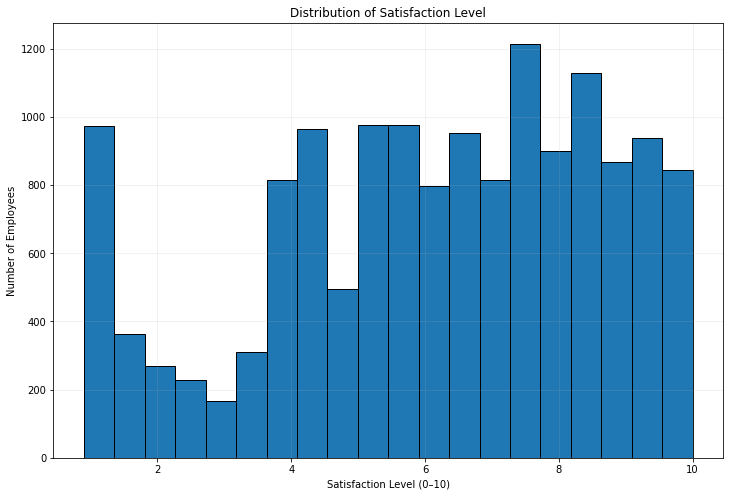

In [0]:
import matplotlib.pyplot as plt

satisfaction = df.select("satisfaction_level").toPandas()

plt.figure(figsize=(12, 8))
plt.hist(satisfaction["satisfaction_level"], bins=20, edgecolor='black')
plt.title("Distribution of Satisfaction Level")
plt.xlabel("Satisfaction Level (0–10)")
plt.ylabel("Number of Employees")
plt.grid(True, alpha=0.2)
plt.show()


From the histogram, we can see that employee satisfaction is not evenly distributed. A large number of employees are highly satisfied (levels around 7–9), but there’s also a noticeable spike of employees with very low satisfaction (around 1–2). This shows there may be two major groups,one that’s happy with their job, and another that is not. Understanding what causes this gap could help improve workplace satisfaction.

 Bar plot: Average satisfaction by Salary Level

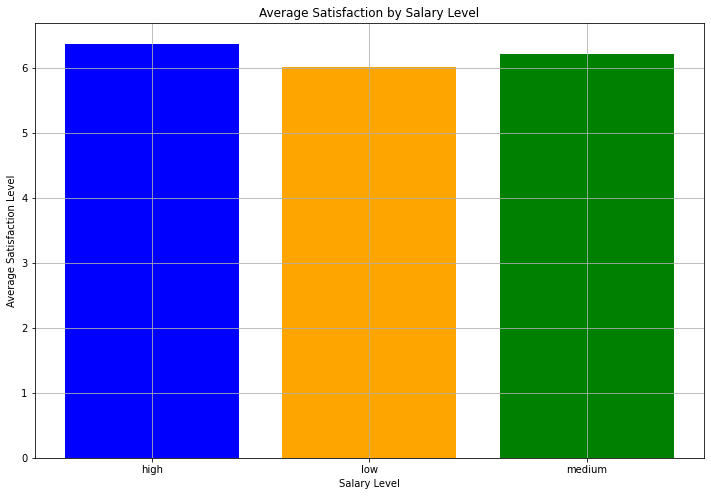

In [0]:
salary_satisfaction = df.groupBy("salary") \
    .avg("satisfaction_level") \
    .orderBy("salary") \
    .toPandas()

salary_satisfaction.columns = ["salary", "avg_satisfaction"]

plt.figure(figsize=(12, 8))
bars = plt.bar(salary_satisfaction["salary"].astype(str), salary_satisfaction["avg_satisfaction"],
               color=["blue", "orange", "green"])
plt.title("Average Satisfaction by Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Average Satisfaction Level")
plt.grid(True)
plt.show()


This chart shows that employees with high salaries have the highest average satisfaction, while those with low salaries have the lowest. However, the difference is not very large. This suggests that while salary might have some effect on satisfaction, it’s probably not the only factor that matters.

Boxplot of average_monthly_hours by salary

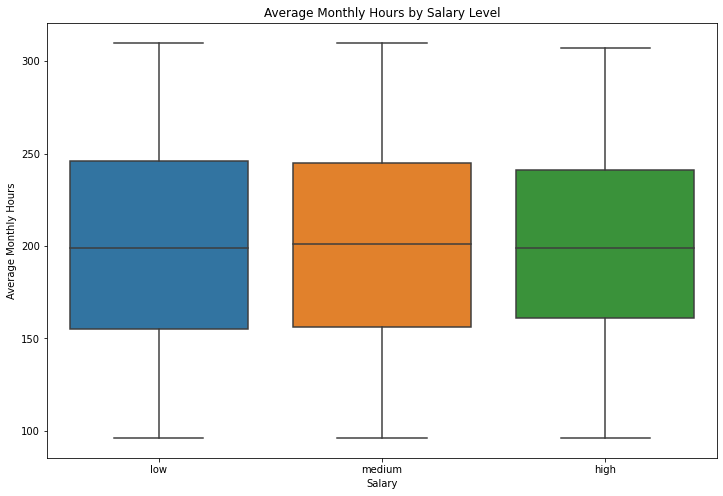

In [0]:
import seaborn as sns

salary_hours = df.select("salary", "average_montly_hours").toPandas()

plt.figure(figsize=(12, 8))
sns.boxplot(data=salary_hours, x="salary", y="average_montly_hours")
plt.title("Average Monthly Hours by Salary Level")
plt.xlabel("Salary")
plt.ylabel("Average Monthly Hours")
plt.show()


From the BoxPlot, we can see that employees in all salary levels (low, medium, high) work about the same number of hours per month. The medians are very close, and the spread of hours looks similar. This suggests that salary is not directly related to how much someone works, which is interesting because we might expect higher-paid employees to work more ,however that’s not what the data shows.

Hexbin Plot of Satisfaction Level by Average Monthly Hours

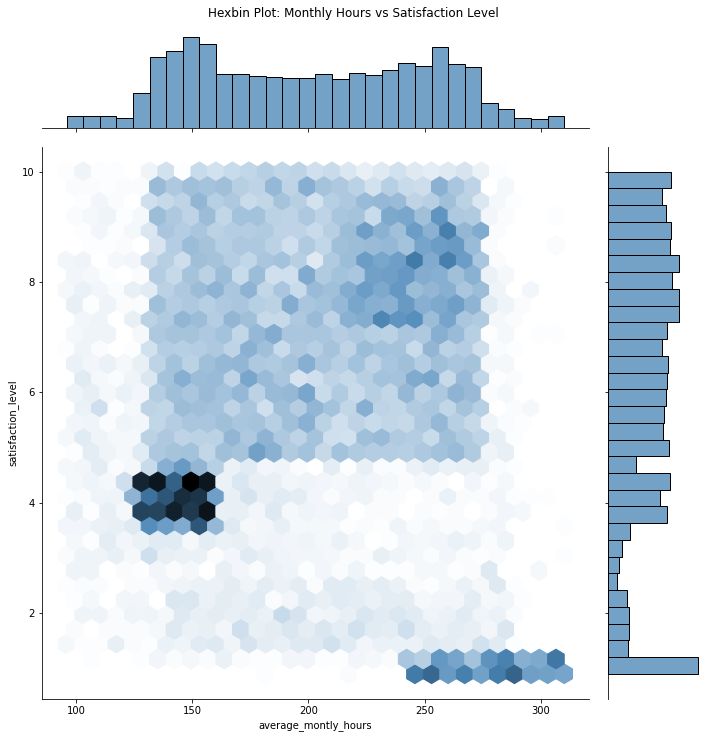

In [0]:
hex_data = df.select("average_montly_hours", "satisfaction_level").toPandas()

sns.jointplot(
    data=hex_data,
    x="average_montly_hours",
    y="satisfaction_level",
    kind="hex",
    color="steelblue",
    height= 10,
  
).fig.suptitle("Hexbin Plot: Monthly Hours vs Satisfaction Level", y=1.02)

plt.show()

This hexbin plot shows that most employees work between 150 and 250 hours per month, and their satisfaction levels vary widely in that range. However, there are two dense clusters where satisfaction is very low,one around 300 hours and another near 140 hours. This could suggest that both overworked and underutilized employees tend to be less satisfied.

---

## Feature Selection
Looking for relevant features to use.

In [0]:
# Only need these columns. 
col_ = [
    "satisfaction_level",
    "last_evaluation",
    "number_project",
    "average_montly_hours",
    "time_spend_company",
    "Work_accident",
    "promotion_last_5years",
    "dept_encoded",
    "salary_encoded"
]

#removing student id as it is not needed. 
cols = col_[1:7]
new_df = df.select(col_)

#dropping null values
new_df = new_df.dropna()
new_df.printSchema()

root
 |-- satisfaction_level: double (nullable = true)
 |-- last_evaluation: double (nullable = true)
 |-- number_project: integer (nullable = true)
 |-- average_montly_hours: integer (nullable = true)
 |-- time_spend_company: integer (nullable = true)
 |-- Work_accident: integer (nullable = true)
 |-- promotion_last_5years: integer (nullable = true)
 |-- dept_encoded: vector (nullable = true)
 |-- salary_encoded: vector (nullable = true)



In [0]:
# checking to see the correaltion between the columns and the target column. 

for col in cols:
    correlation = new_df.stat.corr(col, col_[0], method="pearson")
    print(f"Feature Name: {col}, Target Col: {col_[0]} | Score: {correlation}")

Feature Name: last_evaluation, Target Col: satisfaction_level | Score: 0.10502121397148668
Feature Name: number_project, Target Col: satisfaction_level | Score: -0.14296958603690105
Feature Name: average_montly_hours, Target Col: satisfaction_level | Score: -0.020048113219472686
Feature Name: time_spend_company, Target Col: satisfaction_level | Score: -0.10086607257796748
Feature Name: Work_accident, Target Col: satisfaction_level | Score: 0.058697241051973596
Feature Name: promotion_last_5years, Target Col: satisfaction_level | Score: 0.025605185709039798


##### Since the correlation between the column is not very strong as expected, so we are using all the columns.
--- 

### Preparing data for Machine learning Algorithms.

In [0]:
assembler = VectorAssembler(inputCols=cols, outputCol="features")
df_assembled = assembler.transform(df)

#### Test Train split

In [0]:
train, test = df_assembled.randomSplit([0.8,0.2], seed=42)

---

## Model training

In [0]:
#importing linear regression and random forest regressor
from pyspark.ml.regression import LinearRegression,RandomForestRegressor

#### Model 1 - Linear Regression, and with L1 and L2 regularizer.

In [0]:
# Base Linear Regression Model
linreg = LinearRegression(featuresCol="features",labelCol="satisfaction_level")
lrModel = linreg.fit(train)

# Ridge Regression (L2 regularization)
ridge = LinearRegression(featuresCol="features", labelCol="satisfaction_level", regParam=0.1, elasticNetParam=0.0)
ridge_model = ridge.fit(train)

# Lasso Regression (L1 regularization)
lasso = LinearRegression(featuresCol="features", labelCol="satisfaction_level", regParam=0.1, elasticNetParam=1.0)
lasso_model = lasso.fit(train)

In [0]:
# Info on base model. 
trainingSummary = lrModel.summary
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)
print("Coefficients: %s" % str(lrModel.coefficients))
print("Intercept: %s" % str(lrModel.intercept))

numIterations: 0
objectiveHistory: [0.0]
RMSE: 2.404903
r2: 0.059569
Coefficients: [2.7033909589146408,-0.37203710682487706,0.0003351925769536581,-0.15588203106588636,0.4387755968859387,0.4266378339794339]
Intercept: 6.019329120892279


#### Model 2

In [0]:
#Random Forest with base parameters
rf = RandomForestRegressor(featuresCol="features", labelCol="satisfaction_level")
rfModel = rf.fit(train)

---

## Hyper Parameter Tuning

Linear regression has no tunable hyperparameters, so hyperparameter tuning is not required for it. However, Random Forest has several tunable parameters, making tuning essential to improve its performance.

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(
    labelCol="satisfaction_level", 
    predictionCol="prediction", 
    metricName="rmse" 
)

paramGrid = ParamGridBuilder() \
    .addGrid(rf.numTrees, [50, 100]) \
    .addGrid(rf.maxDepth, [5, 10]) \
    .addGrid(rf.minInstancesPerNode, [1, 2]) \
    .build()

cv = CrossValidator(
    estimator=rf,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=3,
    parallelism=2  
)

cvModel = cv.fit(train)


---

## Score Comparision

#### A. RMSE

#### 1. Random Forest

Before And After / Hyperparamter Tuning:

In [0]:
# Predictions before hyptertunning.
predictions_before = rfModel.transform(test) #using test data to get the predictions before the tuning

# Set up evaluator
evaluator = RegressionEvaluator(labelCol="satisfaction_level", predictionCol="prediction", metricName="rmse")

# Compute RMSE before tuning
rmse_before = evaluator.evaluate(predictions_before)
print(f"RMSE before tuning: {rmse_before:.4f}")

# Predictions after hypertunning.
predictions_after = cvModel.transform(test) #using test data to get the predictions after the

# Compute RMSE after tuning
rmse_after = evaluator.evaluate(predictions_after)
print(f"RMSE after tuning: {rmse_after:.4f}")

RMSE before tuning: 1.9230
RMSE after tuning: 1.8389


The RMSE dropped from 1.9230 to 1.8389, indicating the model's predictions are closer to the actual satisfaction levels.

This validates that tuning parameters like numTrees, maxDepth, and minInstancesPerNode helped the Random Forest learn better patterns from the data.

#### 2. Linear Regression

In [0]:
# Ridge model on test data
ridge_predictions = ridge_model.transform(test)

# Evaluate RMSE
evaluator.setMetricName("rmse")
ridge_rmse = evaluator.evaluate(ridge_predictions)

# Print results
print(f"Ridge Regression - RMSE: {ridge_rmse:.4f}")

# lasso model on test data
lasso_predictions = lasso_model.transform(test)

# Evaluate RMSE
evaluator.setMetricName("rmse")
lasso_rmse = evaluator.evaluate(lasso_predictions)

print(f"Lasso Regression - RMSE: {lasso_rmse:.4f}")

Ridge Regression - RMSE: 2.4369
Lasso Regression - RMSE: 2.4475


#### B. R-squared values for the 3 models:

In [0]:
#Random Forest 
# Before
from pyspark.ml.evaluation import RegressionEvaluator
evaluator_r2 = RegressionEvaluator(labelCol="satisfaction_level", predictionCol="prediction", metricName="r2")

# Calculating R-squared for Random forest
r2_rf = evaluator_r2.evaluate(predictions_before)
print(f"R-squared Before tuning (Random Forest): {r2_rf:.4f}")

# After 

# Calculating R-squared for Random forest
r2_rf = evaluator_r2.evaluate(predictions_after)
print(f"R-squared After tuning (Random Forest): {r2_rf:.4f}")

#-----------------------------------------------------------------#

# Linear Regression Model.
predictions_lr = lrModel.transform(test)
r2_lr = evaluator_r2.evaluate(predictions_lr)
print(f"R-squared (Linear Regression): {r2_lr:.4f}")

R-squared Before tuning (Random Forest): 0.4138
R-squared After tuning (Random Forest): 0.4640
R-squared (Linear Regression): 0.0589


R² improved from 0.41 to 0.46 after tuning the Random Forest, showing better model fit. Linear Regression performed poorly with an R² of 0.06, confirming Random Forest is the better choice.

### C. Plotting Pre and Post Hyperparameter Tuning Models

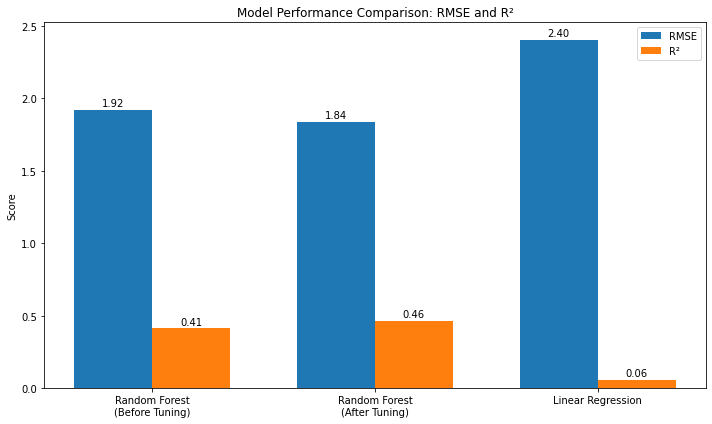

In [0]:
import numpy as np
models = ['Random Forest\n(Before Tuning)', 'Random Forest\n(After Tuning)', 'Linear Regression']
rmse_values = [1.9230, 1.8389, 2.404903] 
r2_values = [0.4138, 0.4640, 0.0589]          

x = np.arange(len(models))
width = 0.35  

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, rmse_values, width, label='RMSE')
bars2 = ax.bar(x + width/2, r2_values, width, label='R²')

# Labels and formatting
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison: RMSE and R²')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()




From the evaluation metrics, we observe that the Random Forest model after hyperparameter tuning achieved the lowest RMSE (1.84) and highest R² score (0.46), indicating the best performance among the tested models. In contrast, the Linear Regression model performed the worst with a high RMSE of 2.40 and a low R² of 0.06, suggesting a poor fit to the data. This demonstrates that Random Forest is a better choice for modeling satisfaction level, especially after tuning, due to its ability to capture non-linear relationships in the data.

---

## Ensemble of the best models

In [0]:
import numpy as np
print(cvModel.getEstimatorParamMaps()[np.argmax(cvModel.avgMetrics)])
# getting the best hyperparams

{Param(parent='RandomForestRegressor_99d37b1a888f', name='numTrees', doc='Number of trees to train (>= 1).'): 100, Param(parent='RandomForestRegressor_99d37b1a888f', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes. Must be in range [0, 30].'): 5, Param(parent='RandomForestRegressor_99d37b1a888f', name='minInstancesPerNode', doc='Minimum number of instances each child must have after split. If a split causes the left or right child to have fewer than minInstancesPerNode, the split will be discarded as invalid. Should be >= 1.'): 1}


##### Best Models with best params. 

In [0]:
# using the best features for random forest regression. 
rfregmodel = RandomForestRegressor(featuresCol="features", labelCol="satisfaction_level", maxDepth=5, minInstancesPerNode=1)
rfMod = rfregmodel.fit(train)

#using the orignal linear reg model beacuse it has less rmse then ridge and lasso regularization. 
linregmodel = LinearRegression(featuresCol="features",labelCol="satisfaction_level")
linMod = linregmodel.fit(train)

Here we are going to implement ensemble method by taking the average of predictions made by both model, assigning same weights to both so that both of the predictions are getting the same importance. 

In [0]:
prediction_rf = rfMod.transform(test)\
    .withColumnRenamed("prediction","RandomForestPrediction")
prediction_linrg = linMod.transform(prediction_rf)\
    .withColumnRenamed("prediction","LinRegPrediction")

For now, not assigning any weights to the predicted values - keeping predictions from both models at same weight. 

In [0]:
from pyspark.sql.functions import col
reg_weights = 1
lin_weights = 1 
final_ = prediction_linrg.withColumn(
    "final_prediction",
    ((col("RandomForestPrediction") * reg_weights) + (col("linRegPrediction")) * lin_weights) / 2
)

In [0]:
final_.select( 'RandomForestPrediction',
 'LinRegPrediction',
 'final_prediction','satisfaction_level').show(10)

# showing how each predictions from best models and their ensembled results compares with t he true prediction label. 

+----------------------+------------------+------------------+------------------+
|RandomForestPrediction|  LinRegPrediction|  final_prediction|satisfaction_level|
+----------------------+------------------+------------------+------------------+
|     1.773848202938559| 5.261697673630874|3.5177729382847165|               1.1|
|    2.2406173100556086| 5.327981960551298|3.7842996353034533|               1.0|
|     6.899606663558677| 6.158207527590722|6.5289070955746995|               8.9|
|     4.331977609803861|  6.34408234283706| 5.338029976320461|               4.1|
|     6.857935832520667| 5.873571840034351| 6.365753836277509|               7.6|
|     4.325034579078405|  6.39513342882277| 5.360084003950588|               4.6|
|     4.255137280294653|6.2035497136600695| 5.229343496977361|               3.8|
|    1.9678575069951862| 5.790239964182416|3.8790487355888015|               1.0|
|     6.578469547804166| 6.341204034756503| 6.459836791280335|               8.4|
|     4.33197760

In [0]:
# function to get the RMSE values. 
def rmse_score(dataframe, prediction_col, label_col):
    evaluator = RegressionEvaluator(
        labelCol=label_col,
        predictionCol=prediction_col,
        metricName="rmse"
    )
    rmse = evaluator.evaluate(dataframe)
    return rmse

In [0]:
print(f"The RMSE score from the ensemble method is : {rmse_score(final_,'final_prediction','satisfaction_level')}")

The RMSE score from the ensemble method is : 2.083846410607816


---

Comparing RMSE of Linear Regression, Random Forest, and Ensemble Models

In [0]:
# RMSE values
rmse_lr = rmse_score(final_, 'LinRegPrediction', 'satisfaction_level')
rmse_rf = rmse_score(final_, 'RandomForestPrediction', 'satisfaction_level')
rmse_ensemble = rmse_score(final_, 'final_prediction', 'satisfaction_level')

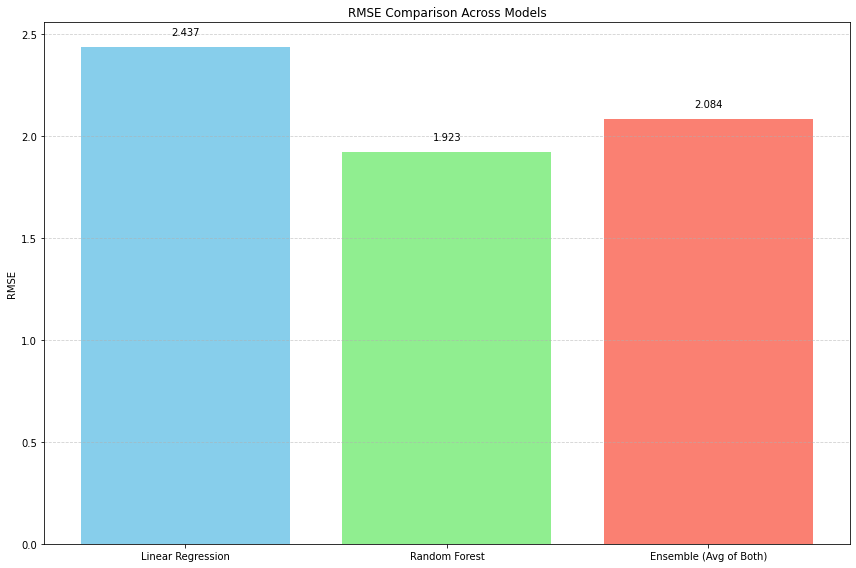

In [0]:
import matplotlib.pyplot as plt

# Model names
models = ['Linear Regression', 'Random Forest', 'Ensemble (Avg of Both)']

# Using stored RMSE values
rmse_values = [rmse_lr, rmse_rf, rmse_ensemble]

# Plot
plt.figure(figsize=(12, 8))
bars = plt.bar(models, rmse_values, color=['skyblue', 'lightgreen', 'salmon'])
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, f'{yval:.3f}', ha='center', va='bottom')
plt.title('RMSE Comparison Across Models')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Among the three models, Random Forest had the lowest RMSE (1.923), showing it predicted satisfaction most accurately. The Ensemble model (RMSE 2.084) slightly improved over Linear Regression (RMSE 2.437), but did not outperform Random Forest, indicating that non-linear models like RF are better suited for this data. It is clear that emsembled final model is not doing very well compared to the random forest model beacuse, it is averaging the prediction from random forest and linear regression. Since the linear regression model has higher RMSE, it has more effect on the overall RMSE of the ensemble model. To improve this further we can assign lower weight to the predictions from linear regression, so that the RMSE from linear regression has less effect on final RMSE. 










# 5. Conclusion
---
*(Briefly describe what you have done using cloud computing techniques and what you discovered. Discuss any shortcomings of the process and results. Propose future work. **Finally, discuss the lessons learned from doing the project**.)*

In this project, we used cloud computing tools like Databricks and PySpark to perform end-to-end analysis and modeling on HR data. We cleaned and transformed the data, trained both Linear Regression and Random Forest models, and tuned hyperparameters using cross-validation to improve performance. Random Forest outperformed Linear Regression significantly, but even after tuning, the R² score suggests there’s room for better feature engineering. A limitation was the relatively modest predictive power of the models, possibly due to the simplicity of input features or label noise. We also compared the RMSE of Linear Regression, Random Forest, and an Ensemble model to evaluate prediction accuracy, confirming that Random Forest consistently delivered the best performance among the three. In the future, incorporating more behavioral or temporal data could enhance performance; overall, we learned how scalable cloud tools support iterative data workflows and improve model reproducibility in team environments.

# 6. References

https://www.kaggle.com/datasets/redpen12/employees-satisfaction-analysis

---
(*Use the following requirements for writing your reports. DO NOT DELETE THE CELLS BELLOW*)